In [23]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
# Keras Libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
sns.set(style="darkgrid")

In [25]:
#Directory and get the train validation and test datas 
base_dir='E:\DATASETS\chest_xray'


In [26]:
#Directory with train
train_dir=os.path.join(base_dir,'train')
train_dir_pneumonia=os.path.join(train_dir,'PNEUMONIA')
train_dir_normal=os.path.join(train_dir,'NORMAL')

In [27]:
#Directory with validation
valid_dir=os.path.join(base_dir,'val')
val_pneumonia =os.path.join(valid_dir,'PNEUMONIA')
val_normal=os.path.join(valid_dir,'NORMAL')

In [28]:
test_dir=os.path.join(base_dir,'test')

In [29]:
#Showing some images
no_disease=(len(os.listdir(train_dir_normal)))
have_disease=(len(os.listdir(train_dir_pneumonia)))


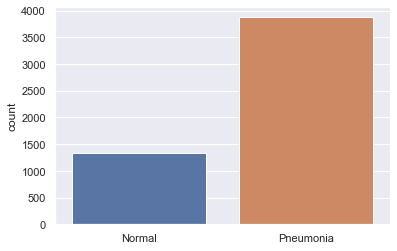

In [30]:
l=[]

for i in range (0,no_disease):
    l.append("Normal")
for i in range (0,have_disease):
    l.append("Pneumonia")

sns.countplot(l)
    


### Data is is quite unbalanced.So we need to augment the data.

normal picture title:  IM-0446-0001.jpeg
246
E:\DATASETS\chest_xray\train\NORMAL\IM-0446-0001.jpeg
normal picture title:  IM-0545-0001-0001.jpeg
370
E:\DATASETS\chest_xray\train\NORMAL\IM-0545-0001-0001.jpeg
normal picture title:  NORMAL2-IM-0616-0001.jpeg
770
E:\DATASETS\chest_xray\train\NORMAL\NORMAL2-IM-0616-0001.jpeg
normal picture title:  IM-0626-0001-0001.jpeg
459
E:\DATASETS\chest_xray\train\NORMAL\IM-0626-0001-0001.jpeg
normal picture title:  IM-0278-0001.jpeg
104
E:\DATASETS\chest_xray\train\NORMAL\IM-0278-0001.jpeg
normal picture title:  IM-0221-0001.jpeg
59
E:\DATASETS\chest_xray\train\NORMAL\IM-0221-0001.jpeg
normal picture title:  IM-0207-0001.jpeg
47
E:\DATASETS\chest_xray\train\NORMAL\IM-0207-0001.jpeg


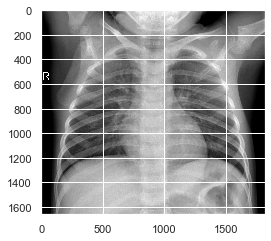

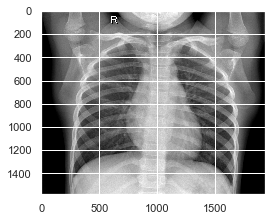

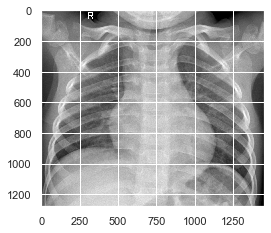

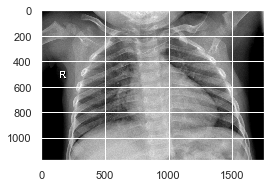

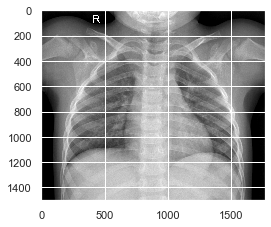

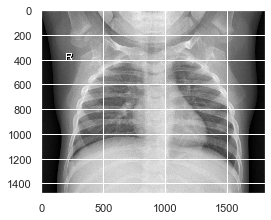

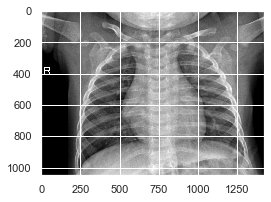

In [31]:
#Normal pic and iterate we can check also validation sets like this .

for i in range (1,8):
    rand_norm= np.random.randint(0,len(os.listdir(train_dir_normal)))
    norm_pic = os.listdir(train_dir_normal)[rand_norm]
    print('normal picture title: ',norm_pic)


    print(rand_norm)


    norm_address=os.path.join(train_dir_normal,norm_pic)

    print(norm_address)

    norm_load = Image.open(norm_address) #Loading image

    f = plt.figure(figsize= (4,4))
    img_plot = plt.imshow(norm_load,cmap='gray') #showing image

    i=i+1


In [32]:
norm_load.size
print(tf.__version__)

2.2.0


In [33]:
#MODEL 
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
   
    tf.keras.layers.Dense(128, activation='relu'), 
     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  
    
])

#too much layers caused downsampling

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)       

In [36]:
# compile
opt=tf.keras.optimizers.RMSprop(
    learning_rate=0.001 
)

model.compile(optimizer='adam',
    loss='binary_crossentropy',     
              metrics=['accuracy'])




In [37]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


In [38]:
training_gen = train_datagen.flow_from_directory(
train_dir,
batch_size=42,
target_size=(150,150),
class_mode='binary'
)

validat_gen=validation_datagen.flow_from_directory(
valid_dir,
batch_size=22,
target_size=(150,150),
class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [39]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('accuracy')>=0.97):
                print("\nReached 97% accuracy so cancelling training!")
                self.model.stop_training=True

In [40]:
callbacks = myCallback()

In [41]:
history = model.fit(training_gen,
                              validation_data=validat_gen,
                              steps_per_epoch=128,
                              epochs=30,
                              validation_steps=4,
                              shuffle=True,callbacks=[callbacks]  
                              )

Epoch 1/30
128/128 [==============================] - 91s 707ms/step - loss: 0.5840 - accuracy: 0.7443 - val_loss: 0.8417 - val_accuracy: 0.5000
Epoch 2/30
128/128 [==============================] - 90s 705ms/step - loss: 0.5445 - accuracy: 0.7400 - val_loss: 0.6594 - val_accuracy: 0.5000
Epoch 3/30
128/128 [==============================] - 90s 707ms/step - loss: 0.4869 - accuracy: 0.7606 - val_loss: 0.5369 - val_accuracy: 0.6250
Epoch 4/30
128/128 [==============================] - 90s 706ms/step - loss: 0.4250 - accuracy: 0.7980 - val_loss: 0.5945 - val_accuracy: 0.6250
Epoch 5/30
128/128 [==============================] - 90s 705ms/step - loss: 0.4001 - accuracy: 0.8100 - val_loss: 0.4065 - val_accuracy: 0.9375
Epoch 6/30
128/128 [==============================] - 90s 706ms/step - loss: 0.3479 - accuracy: 0.8458 - val_loss: 0.5955 - val_accuracy: 0.7500
Epoch 7/30
128/128 [==============================] - 90s 707ms/step - loss: 0.3186 - accuracy: 0.8611 - val_loss: 1.1414 - val_ac

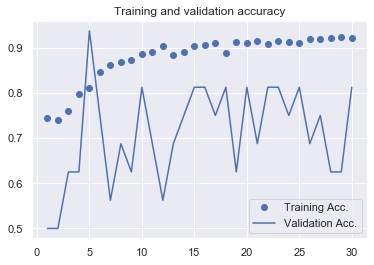

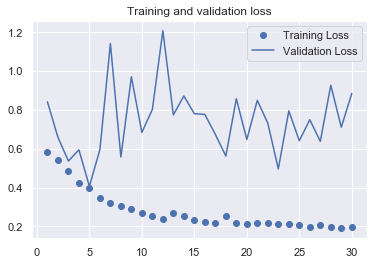

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Acc.')
plt.plot(epochs, val_acc, 'b', label='Validation Acc.')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [121]:
model.save('model-94-final.hdf5')